In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [2]:
dados_enem = pd.read_csv('C:\\Users\\Lucas\\Google Drive\\Python\\insper\\machine_learning_insper\\enem\\microdados_enem_2019\\DADOS\\MICRODADOS_ENEM_2019.csv', encoding='latin1', sep= ';')

In [4]:
dados_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,1,2914802.0,Itabuna,29.0,BA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,1,2910800.0,Feira de Santana,29.0,BA,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,1,2304400.0,Fortaleza,23.0,CE,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2304400,Fortaleza,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,C,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,1,1721000.0,Palmas,17.0,TO,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1721000,Palmas,17,TO,1,1,1,1,504.0,510.0,513.0,516.0,483.8,503.6,537.3,392.0,BACCEEBEECDBEDDAEECDEDEADEBBCDBCAACADEEACCBBD,AECEDADAABAADBAADAEBACBAECCDAEADCDBBECCEDABCD,99999AAABEBBCCBDCAEECADBACAADAECCCDCCBAEBDEEEAEECA,DDBBBBCDCCDCAECCBBECDAEBADCD..CABCCECAEBDBBDA,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBDBBCC,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,120.0,120.0,100.0,0.0,460.0,C,E,B,D,4,E,A,C,C,A,B,B,A,B,A,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,1,3118601.0,Contagem,31.0,MG,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

In [5]:
dados_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 5.2+ GB


### limpando registros com dados NaN 

In [6]:
dados_enem = dados_enem.dropna()

In [7]:
dados_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881707 entries, 26 to 5095245
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 921.6+ MB


In [8]:
print(list(dados_enem.columns))

['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_

In [9]:
dados_enem_prev = dados_enem[['CO_ESCOLA','NU_INSCRICAO','TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                              'NU_IDADE','TP_SEXO', 'SG_UF_RESIDENCIA',
                              'TP_ESTADO_CIVIL','TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT',
                              'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC','NU_NOTA_REDACAO', 'TP_STATUS_REDACAO',
                              'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 
                              'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
                             ]]
dados_enem_prev.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NU_NOTA_REDACAO,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,900.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,580.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,660.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,620.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,260.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B


Deixando apenas os alunos em que a redação foi caracterizadas "Sem problemas", ou seja, não foi anulada

In [10]:
# deixando apenas os alunos em que a redação foi caracterizadas "Sem problemas", ou seja, não foi anulada
dados_enem_prev = dados_enem_prev.query('TP_STATUS_REDACAO == 1')

Fazendo cálculo da média por aluno das áreas (competências)

In [11]:
dados_enem_prev['media_areas'] = (dados_enem_prev['NU_NOTA_CN'] + dados_enem_prev['NU_NOTA_CH'] + dados_enem_prev['NU_NOTA_LC'] + dados_enem_prev['NU_NOTA_MT']) / 4
dados_enem_prev.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,NU_NOTA_REDACAO,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,900.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,580.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,660.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,620.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,260.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475


In [12]:
# dados_enem_prev.info()

In [13]:
dados_enem_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853862 entries, 26 to 5095245
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CO_ESCOLA               853862 non-null  float64
 1   NU_INSCRICAO            853862 non-null  int64  
 2   TP_ANO_CONCLUIU         853862 non-null  int64  
 3   TP_ESCOLA               853862 non-null  int64  
 4   TP_ENSINO               853862 non-null  float64
 5   NU_IDADE                853862 non-null  float64
 6   TP_SEXO                 853862 non-null  object 
 7   SG_UF_RESIDENCIA        853862 non-null  object 
 8   TP_ESTADO_CIVIL         853862 non-null  int64  
 9   TP_COR_RACA             853862 non-null  int64  
 10  NU_NOTA_CN              853862 non-null  float64
 11  NU_NOTA_CH              853862 non-null  float64
 12  NU_NOTA_LC              853862 non-null  float64
 13  NU_NOTA_MT              853862 non-null  float64
 14  TP_DEPENDENCIA_ADM

Fazendo média final por aluno

In [14]:
dados_enem_prev = dados_enem_prev.rename({'NU_NOTA_REDACAO':'nota_redacao'}, axis=1)
dados_enem_prev['media_final'] = (dados_enem_prev['nota_redacao'] + dados_enem_prev['media_areas']) / 2
dados_enem_prev.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,nota_redacao,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,900.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,580.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800,515.9000
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,660.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450,559.2250
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,620.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925,616.4625
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,260.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475,328.2375


In [15]:
print(list(dados_enem_prev.columns))

['CO_ESCOLA', 'NU_INSCRICAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'NU_IDADE', 'TP_SEXO', 'SG_UF_RESIDENCIA', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'nota_redacao', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'media_areas', 'media_final']


In [16]:
dados_enem_prev = dados_enem_prev[['CO_ESCOLA','NU_INSCRICAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                                   'NU_IDADE', 'TP_SEXO', 'SG_UF_RESIDENCIA', 'TP_ESTADO_CIVIL',
                                   'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
                                   'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
                                   'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
                                   'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                                   'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                                   'Q023', 'Q024', 'Q025', 'media_areas', 'media_final', 'nota_redacao']]
dados_enem_prev.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final,nota_redacao
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125,900.0
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800,515.9000,580.0
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450,559.2250,660.0
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925,616.4625,620.0
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475,328.2375,260.0


In [17]:
# ver o quantitativo de valores nulos da base
# dados_enem_prev.isnull().sum() 

In [18]:
dados_enem_prev['media_final'].describe()

count    853862.000000
mean        560.125077
std         105.973449
min         203.625000
25%         489.812500
50%         551.825000
75%         627.575000
max         899.262500
Name: media_final, dtype: float64

#### Dividindo os alunos em três grupos pelas notas médias finais

In [19]:
perc =[.33, .66, .99]
include =['object', 'float', 'int']
desc = dados_enem_prev[["nota_redacao","media_areas","media_final"]].describe(percentiles = perc, include = include)

In [20]:
desc

,nota_redacao,media_areas,media_final
count,853862.000000,853862.000000,853862.000000
mean,609.467877,510.782276,560.125077
std,158.594564,70.837438,105.973449
min,40.000000,0.000000,203.625000
33%,540.000000,469.978250,512.025000
50%,600.000000,501.500000,551.825000
66%,660.000000,536.000000,594.537500
99%,960.000000,687.425000,803.454875
max,1000.000000,818.525000,899.262500



**Grupo 0 - Nota baixa** >> 0 a 512 pontos

**Grupo 1 - Nota regular** >> 513 a 594 pontos

**Grupo 2 - Nota alta** >> 595 a 1000 pontos

### classificando cada aluno a partir da sua média final

In [21]:
dados_enem_prev.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final,nota_redacao
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125,900.0
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800,515.9000,580.0
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450,559.2250,660.0
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925,616.4625,620.0
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475,328.2375,260.0


In [22]:
# atribuindo 0, 1 e 2 para cada aluno a depender da sua nota média final

dados_enem_prev['grupo'] = np.where(dados_enem_prev['media_final'] <= 512, 0,
                                     (np.where(dados_enem_prev['media_final'] < 595, 1, 2)))

In [23]:
dados_enem_prev.head(10)

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final,nota_redacao,grupo
26,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125,900.0,2
28,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800,515.9000,580.0,1
31,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450,559.2250,660.0,1
34,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925,616.4625,620.0,2
55,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475,328.2375,260.0,0
56,53007077.0,190002037440,0,2,1.0,17.0,M,DF,1,3,389.7,431.1,482.0,529.7,2.0,1.0,1.0,1.0,B,E,A,B,4,B,B,B,C,B,A,B,A,B,A,B,A,A,B,B,A,D,A,A,A,458.125,509.0625,560.0,0
83,22129375.0,190001121527,0,2,1.0,17.0,F,PI,3,1,427.6,548.8,587.2,699.3,1.0,1.0,1.0,1.0,D,C,C,B,6,G,A,B,C,B,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A,565.725,692.8625,820.0,2
96,15562220.0,190001042836,0,2,1.0,17.0,F,PA,1,2,510.9,585.4,578.4,605.2,2.0,1.0,1.0,1.0,E,F,D,D,3,C,A,B,C,A,A,B,B,B,A,A,A,A,B,A,B,D,B,B,B,569.975,724.9875,880.0,2
100,29160774.0,190001421560,0,2,1.0,19.0,M,BA,1,3,361.2,499.0,403.5,392.5,2.0,1.0,1.0,1.0,C,B,C,D,5,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,414.050,487.0250,560.0,0
105,22010467.0,190001121528,0,2,1.0,17.0,F,PI,1,3,556.8,487.0,571.8,578.5,2.0,1.0,1.0,1.0,B,A,A,F,7,C,A,B,D,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,548.525,674.2625,800.0,2


#### Verificando quantidade de registros por grupo de notas

In [24]:
grupos = dados_enem_prev.groupby(['grupo']).agg({"NU_INSCRICAO": "count"})
grupos.head()

,NU_INSCRICAO
grupo,
0,281705
1,283082
2,289075


### Calculando a nota média por escola no Enem de 2018

In [25]:
dados_enem_2018 = pd.read_csv("microdados_escolas_enem_2018.csv")

In [26]:
dados_enem_2018.head()

,NU_ANO,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,2018,52033333.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,NaN,521.0,568.7,513.1,480.3,1.0,280.0
2,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,29112699.0,NaN,419.9,345.8,NaN,1.0,360.0


In [27]:
print(list(dados_enem_2018.columns))

['NU_ANO', 'CO_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO']


In [28]:
print(len(dados_enem_2018))

5513747


In [29]:
dados_enem_2018 = dados_enem_2018.dropna()

In [30]:
dados_enem_2018 = dados_enem_2018.query('TP_STATUS_REDACAO == 1')

In [31]:
dados_enem_2018.isnull().sum()

NU_ANO               0
CO_ESCOLA            0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
NU_NOTA_MT           0
TP_STATUS_REDACAO    0
NU_NOTA_REDACAO      0
dtype: int64

In [32]:
dados_enem_2018 = dados_enem_2018.groupby("CO_ESCOLA").agg({'NU_NOTA_CN': 'mean',
                                          'NU_NOTA_CH': 'mean',
                                          'NU_NOTA_LC': 'mean',
                                          'NU_NOTA_MT': 'mean',
                                          'NU_NOTA_REDACAO': 'mean'
                                         })

In [33]:
dados_enem_2018.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
CO_ESCOLA,,,,,
11000058.0,599.592701,654.083212,598.710949,658.561314,714.452555
11000171.0,505.911111,614.144444,562.977778,590.444444,560.000000
11000180.0,463.700000,518.600000,515.100000,464.185714,494.285714
11000198.0,556.039474,617.297368,586.947368,597.068421,643.684211
11000244.0,521.274074,592.225926,542.618519,595.688889,595.555556


In [34]:
dados_enem_2018 = dados_enem_2018.reset_index()

In [35]:
dados_enem_2018.head()

,CO_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,11000058.0,599.592701,654.083212,598.710949,658.561314,714.452555
1,11000171.0,505.911111,614.144444,562.977778,590.444444,560.000000
2,11000180.0,463.700000,518.600000,515.100000,464.185714,494.285714
3,11000198.0,556.039474,617.297368,586.947368,597.068421,643.684211
4,11000244.0,521.274074,592.225926,542.618519,595.688889,595.555556


In [36]:
dados_enem_2018 = dados_enem_2018.rename({'NU_NOTA_CN': 'NU_NOTA_CN_ESCOLA',
                  'NU_NOTA_CH': 'NU_NOTA_CH_ESCOLA',
                  'NU_NOTA_LC': 'NU_NOTA_LC_ESCOLA',
                  'NU_NOTA_MT': 'NU_NOTA_MT_ESCOLA',
                  'NU_NOTA_REDACAO': 'NU_NOTA_REDACAO_ESCOLA'}, axis=1)

In [37]:
dados_enem_2018.head()

,CO_ESCOLA,NU_NOTA_CN_ESCOLA,NU_NOTA_CH_ESCOLA,NU_NOTA_LC_ESCOLA,NU_NOTA_MT_ESCOLA,NU_NOTA_REDACAO_ESCOLA
0,11000058.0,599.592701,654.083212,598.710949,658.561314,714.452555
1,11000171.0,505.911111,614.144444,562.977778,590.444444,560.000000
2,11000180.0,463.700000,518.600000,515.100000,464.185714,494.285714
3,11000198.0,556.039474,617.297368,586.947368,597.068421,643.684211
4,11000244.0,521.274074,592.225926,542.618519,595.688889,595.555556


### Juntando dados dos 2 dataframes

In [38]:
dados_finais = dados_enem_prev.merge(dados_enem_2018, how = 'left', left_on = "CO_ESCOLA", right_on = "CO_ESCOLA")
dados_finais.head()

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final,nota_redacao,grupo,NU_NOTA_CN_ESCOLA,NU_NOTA_CH_ESCOLA,NU_NOTA_LC_ESCOLA,NU_NOTA_MT_ESCOLA,NU_NOTA_REDACAO_ESCOLA
0,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125,900.0,2,534.894118,599.529412,569.726471,591.338235,534.705882
1,43013945.0,190001692704,0,2,1.0,18.0,F,RS,1,1,430.4,466.8,515.9,394.1,2.0,1.0,1.0,1.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A,451.800,515.9000,580.0,1,476.220000,573.053846,526.736923,526.026923,514.923077
2,35006713.0,190001595660,0,2,1.0,17.0,F,SP,1,2,371.8,501.4,518.6,442.0,2.0,1.0,1.0,1.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,458.450,559.2250,660.0,1,483.603315,570.241989,531.200000,543.400552,520.110497
3,29398673.0,190001421552,0,2,1.0,17.0,M,BA,1,2,567.3,584.1,595.8,704.5,2.0,1.0,1.0,1.0,E,C,B,B,2,B,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,612.925,616.4625,620.0,2,484.911321,548.973585,527.471698,520.330189,507.547170
4,13080547.0,190001082475,0,2,1.0,17.0,F,AM,1,3,385.8,436.3,393.8,370.0,2.0,1.0,1.0,1.0,H,H,F,C,4,B,A,B,B,A,A,B,A,B,A,A,A,A,B,A,A,C,B,B,B,396.475,328.2375,260.0,0,462.554762,512.577381,472.154365,478.053968,472.460317


In [39]:
#dados_finais.isnull().sum()

In [40]:
print(len(dados_finais))

853862


In [41]:
dados_finais = dados_finais.dropna()

In [42]:
print(len(dados_finais))

843099


In [43]:
dados_finais.isnull().sum()

CO_ESCOLA                 0
NU_INSCRICAO              0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
NU_IDADE                  0
TP_SEXO                   0
SG_UF_RESIDENCIA          0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_MT                0
TP_DEPENDENCIA_ADM_ESC    0
TP_LOCALIZACAO_ESC        0
TP_SIT_FUNC_ESC           0
TP_STATUS_REDACAO         0
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                      0
Q011                      0
Q012                      0
Q013                      0
Q014                      0
Q015                      0
Q016                      0
Q017                      0
Q018                

### Separando as variáveis explicaticas (x) e variável resposta (y)

In [44]:
dados_finais.head(1)

,CO_ESCOLA,NU_INSCRICAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_STATUS_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,media_areas,media_final,nota_redacao,grupo,NU_NOTA_CN_ESCOLA,NU_NOTA_CH_ESCOLA,NU_NOTA_LC_ESCOLA,NU_NOTA_MT_ESCOLA,NU_NOTA_REDACAO_ESCOLA
0,41026039.0,190001867757,0,3,1.0,17.0,F,PR,1,1,618.2,744.7,636.3,713.7,4.0,1.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,678.225,789.1125,900.0,2,534.894118,599.529412,569.726471,591.338235,534.705882


In [45]:
dados_finais.columns

Index(['CO_ESCOLA', 'NU_INSCRICAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'NU_IDADE', 'TP_SEXO', 'SG_UF_RESIDENCIA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_STATUS_REDACAO', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'media_areas',
       'media_final', 'nota_redacao', 'grupo', 'NU_NOTA_CN_ESCOLA',
       'NU_NOTA_CH_ESCOLA', 'NU_NOTA_LC_ESCOLA', 'NU_NOTA_MT_ESCOLA',
       'NU_NOTA_REDACAO_ESCOLA'],
      dtype='object')

### fazendo análise descritiva dos itens respondidos no questionário socioeconômico

In [46]:
questionario = dados_finais[['Q001',
       'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'grupo']]

In [47]:
questionario_0 = questionario.query('grupo == 0')
questionario_0 = questionario_0.drop('grupo', axis=1)
questionario_0.describe()

,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043,279043
unique,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,E,E,A,B,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,66640,90909,76126,127665,100800,268404,221485,151315,180037,208439,263722,194320,141848,250093,164974,275528,242042,211629,193569,232123,81829,232055,177344,188624


In [48]:
questionario_1 = questionario.query('grupo == 1')
questionario_1 = questionario_1.drop('grupo', axis=1)
questionario_1.describe()

,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102,280102
unique,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,E,E,C,B,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,D,A,A,B
freq,87206,108214,78899,129831,74158,267293,201374,148875,146494,214133,264646,164308,172521,244659,143636,275570,221912,194882,191709,217851,88147,211788,134814,221803


In [49]:
questionario_2 = questionario.query('grupo == 2')
questionario_2 = questionario_2.drop('grupo', axis=1)
questionario_2.describe()

,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954,283954
unique,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,E,E,D,D,C,A,B,C,B,A,B,B,B,A,B,A,A,B,A,A,D,A,B,B
freq,96523,105902,86342,98610,49644,240414,143579,123873,133710,223255,259377,141301,208205,234010,184469,268112,183794,151908,173946,179973,100108,177527,141882,255364


fazendo describe do 1% dos alunos que tiraram as maiores notas

In [50]:
um_porcento = dados_finais.query('media_final >= 803.45')

In [51]:
um_porcento = um_porcento[['Q001',
       'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']]

um_porcento.describe()

,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373,8373
unique,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,G,G,E,D,Q,A,C,D,B,A,B,B,B,A,B,A,B,C,B,B,E,B,B,B
freq,2764,3207,3478,3895,1473,4474,2614,4395,3793,7203,6984,5379,7536,6020,6998,7046,5019,2675,4895,5484,4066,5086,3421,8244


### plotando gráficos para explorar a relação das variáveis explicativas com a variável resposta (grupo)

In [79]:
dados_finais_analise = dados_finais[['TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'NU_IDADE', 'TP_SEXO', 'SG_UF_RESIDENCIA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025','NU_NOTA_CN_ESCOLA',
       'NU_NOTA_CH_ESCOLA', 'NU_NOTA_LC_ESCOLA', 'NU_NOTA_MT_ESCOLA',
       'NU_NOTA_REDACAO_ESCOLA','grupo']]



In [ ]:
sns.pairplot(dados_finais_analise)

In [ ]:
import plotly.express as px

fig = px.box(dados_finais_analise, x = 'grupo', y="NU_IDADE", color='grupo')
fig.show()

In [ ]:
fig = px.box(dados_finais_analise, x = 'grupo', y="NU_NOTA_MT_ESCOLA", color='grupo')
fig.show()

### Dividindo as observações nas variáveis explicativas (x) e de resposta (y)

In [53]:
x = dados_finais[['TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'NU_IDADE', 'TP_SEXO', 'SG_UF_RESIDENCIA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'Q001',
       'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010',
       'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025','NU_NOTA_CN_ESCOLA',
       'NU_NOTA_CH_ESCOLA', 'NU_NOTA_LC_ESCOLA', 'NU_NOTA_MT_ESCOLA',
       'NU_NOTA_REDACAO_ESCOLA']]

y = dados_finais['grupo']

In [54]:
print(len(x))

843099


In [55]:
x.head(1)

,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_SEXO,SG_UF_RESIDENCIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_CN_ESCOLA,NU_NOTA_CH_ESCOLA,NU_NOTA_LC_ESCOLA,NU_NOTA_MT_ESCOLA,NU_NOTA_REDACAO_ESCOLA
0,0,3,1.0,17.0,F,PR,1,1,4.0,1.0,1.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B,534.894118,599.529412,569.726471,591.338235,534.705882


Transformando dados de x em dummies (0 ou 1)

In [56]:
x = pd.get_dummies(x)
x.head()

,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,Q005,NU_NOTA_CN_ESCOLA,NU_NOTA_CH_ESCOLA,NU_NOTA_LC_ESCOLA,NU_NOTA_MT_ESCOLA,NU_NOTA_REDACAO_ESCOLA,TP_SEXO_F,TP_SEXO_M,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q007_A,Q007_B,Q007_C,Q007_D,Q008_A,Q008_B,Q008_C,Q008_D,Q008_E,Q009_A,Q009_B,Q009_C,Q009_D,Q009_E,Q010_A,Q010_B,Q010_C,Q010_D,Q010_E,Q011_A,Q011_B,Q011_C,Q011_D,Q011_E,Q012_A,Q012_B,Q012_C,Q012_D,Q012_E,Q013_A,Q013_B,Q013_C,Q013_D,Q013_E,Q014_A,Q014_B,Q014_C,Q014_D,Q014_E,Q015_A,Q015_B,Q015_C,Q015_D,Q015_E,Q016_A,Q016_B,Q016_C,Q016_D,Q016_E,Q017_A,Q017_B,Q017_C,Q017_D,Q017_E,Q018_A,Q018_B,Q019_A,Q019_B,Q019_C,Q019_D,Q019_E,Q020_A,Q020_B,Q021_A,Q021_B,Q022_A,Q022_B,Q022_C,Q022_D,Q022_E,Q023_A,Q023_B,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B
0,0,3,1.0,17.0,1,1,4.0,1.0,1.0,2,534.894118,599.529412,569.726471,591.338235,534.705882,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,0,2,1.0,18.0,1,1,2.0,1.0,1.0,3,476.220000,573.053846,526.736923,526.026923,514.923077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
2,0,2,1.0,17.0,1,2,2.0,1.0,1.0,3,483.603315,570.241989,531.200000,543.400552,520.110497,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,0,2,1.0,17.0,1,2,2.0,1.0,1.0,2,484.911321,548.973585,527.471698,520.330189,507.547170,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,0,2,1.0,17.0,1,3,2.0,1.0,1.0,4,462.554762,512.577381,472.154365,478.053968,472.460317,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1


### Criando o modelo de classificação a partir da nossa base de treinamento

In [57]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=13)

In [59]:
y_train

627627    2
419001    2
480274    2
774898    1
725110    0
         ..
697428    1
259552    1
256227    2
711289    0
497442    1
Name: grupo, Length: 674479, dtype: int32

### Algoritmo Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
modelo = nb.fit(X_train, y_train)
y_pred = modelo.predict(X_test) 

In [61]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.5359269363064879


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.52      0.63      0.57     55619
           1       0.42      0.38      0.40     56331
           2       0.67      0.60      0.63     56670

    accuracy                           0.54    168620
   macro avg       0.54      0.54      0.53    168620
weighted avg       0.54      0.54      0.53    168620



In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

print(cm)

[[34919 16121  4579]
 [22695 21275 12361]
 [ 9179 13317 34174]]


Matriz de confusão com valores absolutos

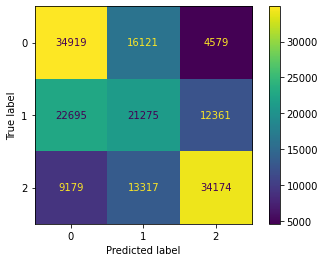

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()


Matriz de confusão com valores em percentual

In [65]:
matrix_perc = confusion_matrix(y_test, y_pred, normalize='true')
matrix_perc

array([[0.62782502, 0.28984699, 0.08232798],
       [0.40288651, 0.37767837, 0.21943512],
       [0.16197283, 0.23499206, 0.60303512]])

In [66]:
matrix_perc[0].sum()

1.0

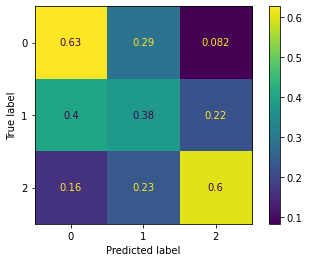

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_perc, display_labels=modelo.classes_)


disp.plot()


<AxesSubplot:>

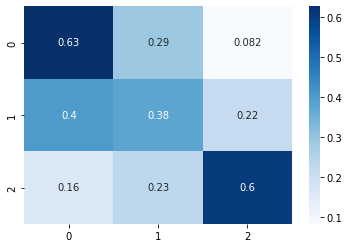

In [68]:
import seaborn as sns
sns.heatmap(matrix_perc, annot=True, cmap='Blues')

## Prevendo os grupos com regressão logística

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state=13)

In [70]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

model = logisticRegr.fit(X_train, Y_train.values.ravel())


c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
predictions = model.predict(X_test)
predictions_prob = model.predict_proba(X_test)
#predictions = pd.DataFrame(predictions, columns=['predito'])
#predictions_prob = pd.DataFrame(predictions_prob, columns=["grupo_predito"])

In [72]:
predictions = pd.DataFrame(predictions, columns=['predito'])
#predictions_prob = pd.DataFrame(predictions_prob, columns=["grupo_predito"])

In [73]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58     55619
           1       0.43      0.40      0.41     56331
           2       0.68      0.62      0.65     56670

    accuracy                           0.55    168620
   macro avg       0.55      0.55      0.55    168620
weighted avg       0.55      0.55      0.55    168620



In [74]:
matrix_perc = confusion_matrix(y_test, predictions, normalize='true')
matrix_perc

array([[0.62579334, 0.29786584, 0.07634082],
       [0.38303953, 0.39809341, 0.21886705],
       [0.14017999, 0.24132698, 0.61849303]])

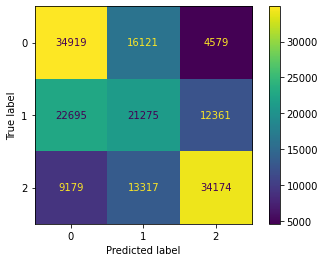

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


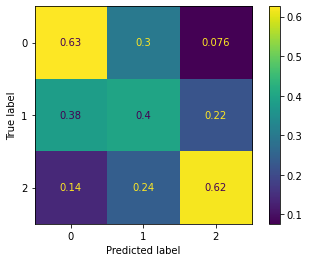

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=matrix_perc, display_labels=model.classes_)


disp.plot()


<AxesSubplot:>

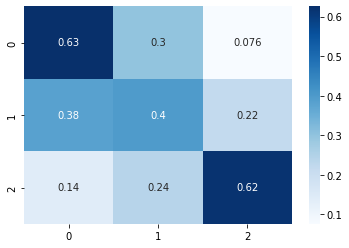

In [77]:
import seaborn as sns
sns.heatmap(matrix_perc, annot=True, cmap='Blues')

### Criando as previsões a partir do algoritmo de árvore de decisão


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)


c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

